In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [3]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey.head()

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse


In [76]:
risk = survey.iloc[:, 10:130:2].fillna(50) ## All the actual questions, risk value
risk.head()

,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,Q15.2_1,Q16.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [77]:
risk.columns = [i for i in range(60)]
risk.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [78]:
waitlist = survey.iloc[:, 11:130:2] ## All the actual questions, risk value
waitlist.head()

,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,Q15.3,Q16.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [79]:
waitlist.columns = [i for i in range(60)]
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [8]:
risk.mean()

0      2.500000
1     95.000000
2     55.083333
3     91.250000
4     45.166667
5      1.750000
6     82.250000
7     43.916667
8     83.583333
9     18.916667
10    80.333333
11    75.833333
12    66.916667
13    89.583333
14    57.916667
15    82.333333
16    66.000000
17    85.500000
18    67.500000
19    69.666667
20    48.916667
21    74.083333
22    83.083333
23    85.750000
24    78.916667
25    75.916667
26    91.666667
27    94.916667
28    26.416667
29    67.166667
        ...    
32    22.833333
33    88.250000
34    80.916667
35    88.166667
36    83.500000
37    73.333333
38    66.166667
39    83.666667
40    18.083333
41    31.583333
42    52.166667
43    80.583333
44    44.666667
45    67.750000
46    80.916667
47    92.250000
48    77.583333
49    57.166667
50    85.000000
51    81.000000
52    80.166667
53    61.583333
54    91.416667
55    81.750000
56    85.250000
57    71.583333
58    82.166667
59    26.916667
60    66.333333
61    69.750000
Length: 62, dtype: float

(-1, 101)

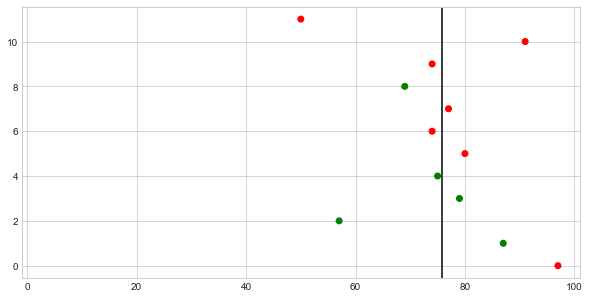

In [62]:
plt.rcParams['figure.figsize'] = [10, 5]
question = 11
y = risk.index.values
x = risk[question]
x_mean = risk[question].mean()
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'


plt.scatter(x, y, marker='o', color=colors[question])
plt.axvline(x=x_mean, color='black')
plt.xlim(-1, 101)

In [60]:
waitlist[waitlist == 'Yes'] = 'green'
waitlist[waitlist == 'No'] = 'red'
waitlist

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
1,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
2,green,red,green,red,green,green,green,green,red,green,...,red,green,red,red,red,green,red,green,green,red
3,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
4,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
5,green,red,green,red,green,green,green,green,green,green,...,green,green,red,red,green,green,red,green,green,green
6,green,red,green,red,green,green,red,green,red,red,...,red,green,red,red,red,red,red,green,red,red
7,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,red,red,green,red,red
8,green,red,green,red,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,red,green
9,green,red,green,red,green,green,red,green,green,green,...,red,green,red,red,red,green,green,green,green,green


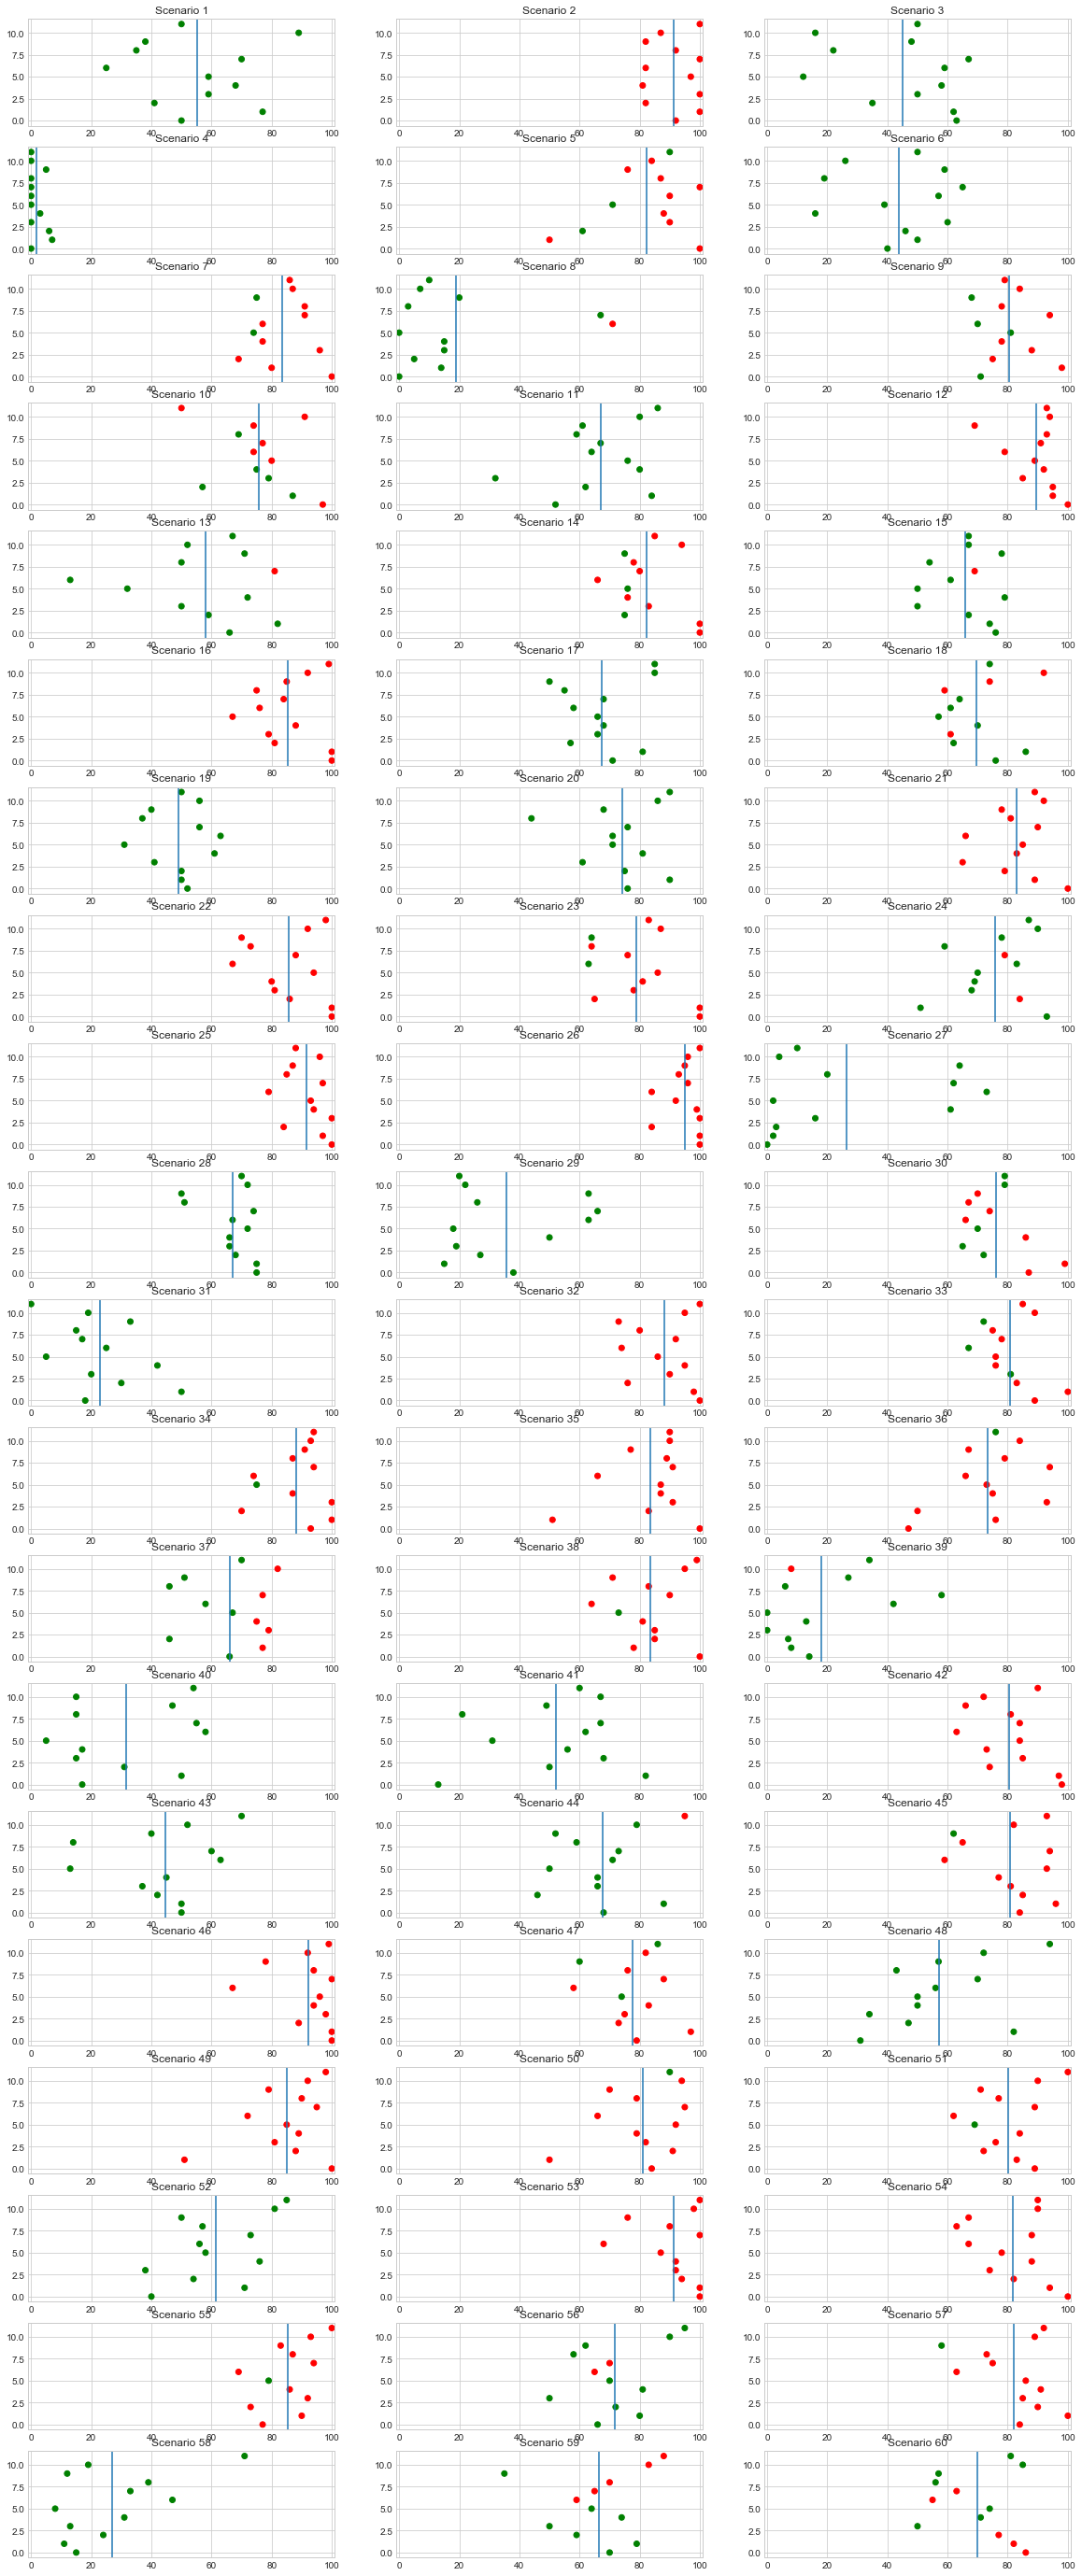

In [81]:
plt.rcParams['figure.figsize'] = [20, 50]
fig, axs = plt.subplots(20, 3)

colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

question_number = 0

for i in range(20):
    for j in range(3):
        axs[i, j].set_xlim([-1, 101])
        axs[i, j].scatter(risk[question_number], y, color=colors[question_number])
        axs[i, j].axvline(x=risk[question_number].mean())
        axs[i, j].set_title(f'Scenario {question_number + 1}')
        question_number += 1
        
